In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark", {'axes.grid' : False})

In [11]:
df = pd.read_csv("../datasets/weatherAUS_clean.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,...,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,...,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,...,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,...,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [12]:
print(df.shape)
df.describe()

(142193, 24)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,2.326738,5.183213,8.042236,39.920123,13.992489,18.644279,68.858235,51.495742,1017.648460,1015.252481,4.649568,4.702658,16.985681,21.675977,2.360682
std,6.388936,7.109617,8.426426,3.185401,2.769638,13.140632,8.851614,8.721688,18.932512,20.532227,6.746267,6.681810,2.294357,2.118753,6.472206,6.871243,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


### ANOVA

One way ANOVA, to see if WindGustDir has an effect on MaxTemp

<AxesSubplot: xlabel='WindGustDir', ylabel='MaxTemp'>

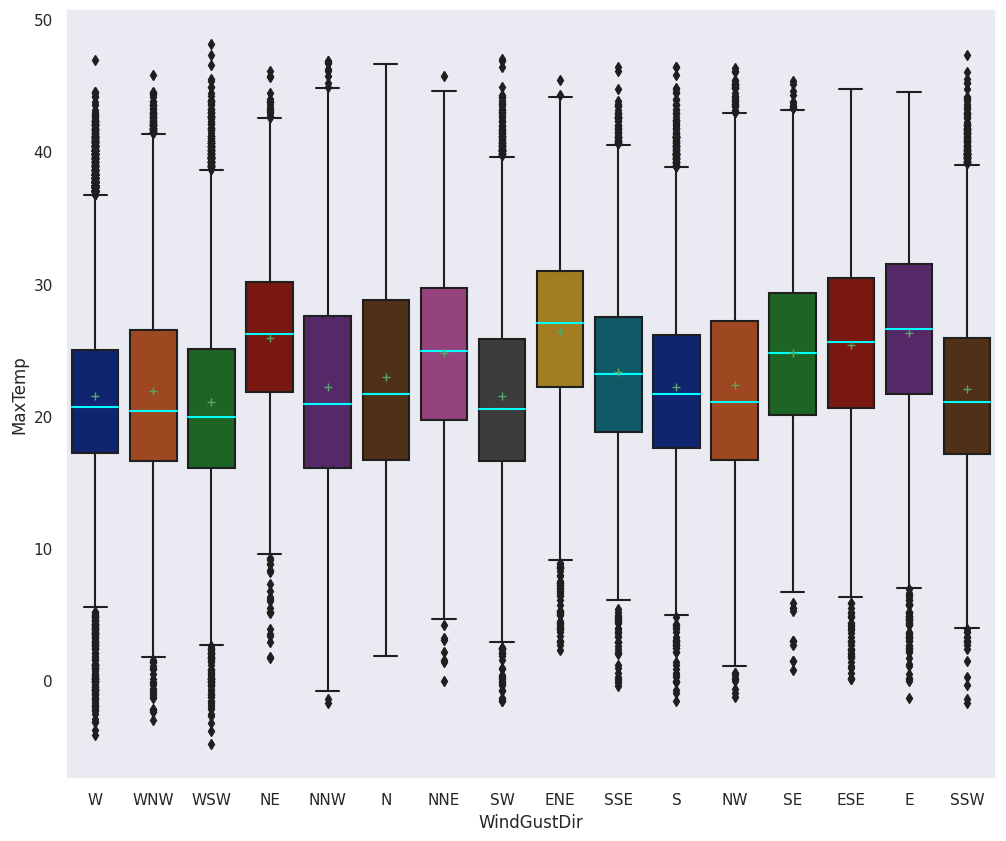

In [33]:
# checking for normality for each sample of MaxTemp categorized by WindGustDir

wgd_vals = df.WindGustDir.unique()
wgd_samples = []

for wgd in wgd_vals:
  wgd_samples.append(df[df['WindGustDir'] == wgd]['MaxTemp'])

plt.figure(figsize=(12, 10))
sns.boxplot(data=df, y='MaxTemp', x="WindGustDir",
            palette='dark', medianprops={'color': 'cyan'}, showmeans=True, meanprops={"marker": "+"})

In [14]:
from scipy.stats import f_oneway

f_oneway(*wgd_samples)

F_onewayResult(statistic=655.303250231724, pvalue=0.0)

Observing the p-value & F-statistic, with degrees of freedom for within & between samples, 15 & ~19000, we reject the null hypothesis that MaxTemp has no effect on the Rainfall with a confidence of 5%.

Now, a two-way ANOVA to see the effects of WindDir9am & WindDir3pm on Evaporation.

In [15]:
from statsmodels.formula.api import ols

formula = "Evaporation ~ C(WindDir9am) + C(WindDir3pm)"
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Evaporation   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     134.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:48:11   Log-Likelihood:            -3.6451e+05
No. Observations:              142193   AIC:                         7.291e+05
Df Residuals:                  142162   BIC:                         7.294e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.9220      0.045    132.444      0.000       5.834       6.010
C(WindDir9am)[T.ENE]    -0.0925      0.049     -1.894      0.058      -0.188       0.003
C(WindDir9am)[T.ESE]     0.0174      0.049      0.354      0.723      -0.079       0.114
C(WindDir9am)[T.N]      -1.0461      0.040    -25.895      0.000      -1.125      -0.967
C(WindDir9am)[T.NE]     -0.4287      0.050     -8.634      0.000      -0.526      -0.331
C(WindDir9am)[T.NNE]    -0.4355      0.049     -8.804      0.000      -0.532      -0.339
C(WindDir9am)[T.NNW]    -1.2474      0.050    -25.064      0.000      -1.345      -1.150
C(WindDir9am)[T.NW]     -1.1637      0.049    -23.949      0.000      -1.259      -1.068
C(WindDir9am)[T.S]      -0.3743      0.049     -7.703      0.000      -0.469      -0.279
C(WindDir9am)[T.SE]      0.0232      0.047      0.493      0.622      -0.069       0.115
C(WindDir9am)[T.SSE]    -0.2183      0.048     -4.591      0.000      -0.312      -0.125
C(WindDir9am)[T.SSW]    -0.6791      0.050    -13.487      0.000      -0.778      -0.580
C(WindDir9am)[T.SW]     -1.0570      0.049    -21.588      0.000      -1.153      -0.961
C(WindDir9am)[T.W]      -1.2886      0.049    -26.263      0.000      -1.385      -1.192
C(WindDir9am)[T.WNW]    -1.2053      0.051    -23.681      0.000      -1.305      -1.106
C(WindDir9am)[T.WSW]    -1.1104      0.052    -21.526      0.000      -1.212      -1.009
C(WindDir3pm)[T.ENE]     0.3530      0.050      7.102      0.000       0.256       0.450
C(WindDir3pm)[T.ESE]     0.1074      0.049      2.206      0.027       0.012       0.203
C(WindDir3pm)[T.N]      -0.2608      0.050     -5.266      0.000      -0.358      -0.164
C(WindDir3pm)[T.NE]      0.0088      0.049      0.179      0.858      -0.088       0.106
C(WindDir3pm)[T.NNE]    -0.2406      0.053     -4.535      0.000      -0.345      -0.137
C(WindDir3pm)[T.NNW]    -0.3503      0.051     -6.894      0.000      -0.450      -0.251
C(WindDir3pm)[T.NW]     -0.1635      0.050     -3.284      0.001      -0.261      -0.066
C(WindDir3pm)[T.S]      -0.2464      0.048     -5.121      0.000      -0.341      -0.152
C(WindDir3pm)[T.SE]     -0.1228      0.044     -2.808      0.005      -0.209      -0.037
C(WindDir3pm)[T.SSE]    -0.1211      0.048     -2.504      0.012      -0.216      -0.026
C(WindDir3pm)[T.SSW]    -0.0837      0.050     -1.667      0.096      -0.182       0.015
C(WindDir3pm)[T.SW]      0.1359      0.049      2.802      0.005       0.041       0.231
C(WindDir3pm)[T.W]      -0.0742      0.048     -1.545      0.122      -0.168       0.020
C(WindDir3pm)[T.WNW]    -0.1216      0.050     -2.449      0.014      -0.219      -0.024
C(WindDir3pm)[T.WSW]     0.0658      0.048      1.357      0.175      -0.029       0.161
=========================================================

In [16]:
# Another library for ANOVA
import statsmodels.api as sm

table = sm.stats.anova_lm(model)
print(table)

                     df        sum_sq      mean_sq           F        PR(>F)
C(WindDir9am)      15.0  3.621679e+04  2414.452371  244.661625  0.000000e+00
C(WindDir3pm)      15.0  3.643407e+03   242.893784   24.612947  2.517987e-69
Residual       142162.0  1.402931e+06     9.868537         NaN           NaN


### Correlation

Now, we check the correlation between all the continuous variables

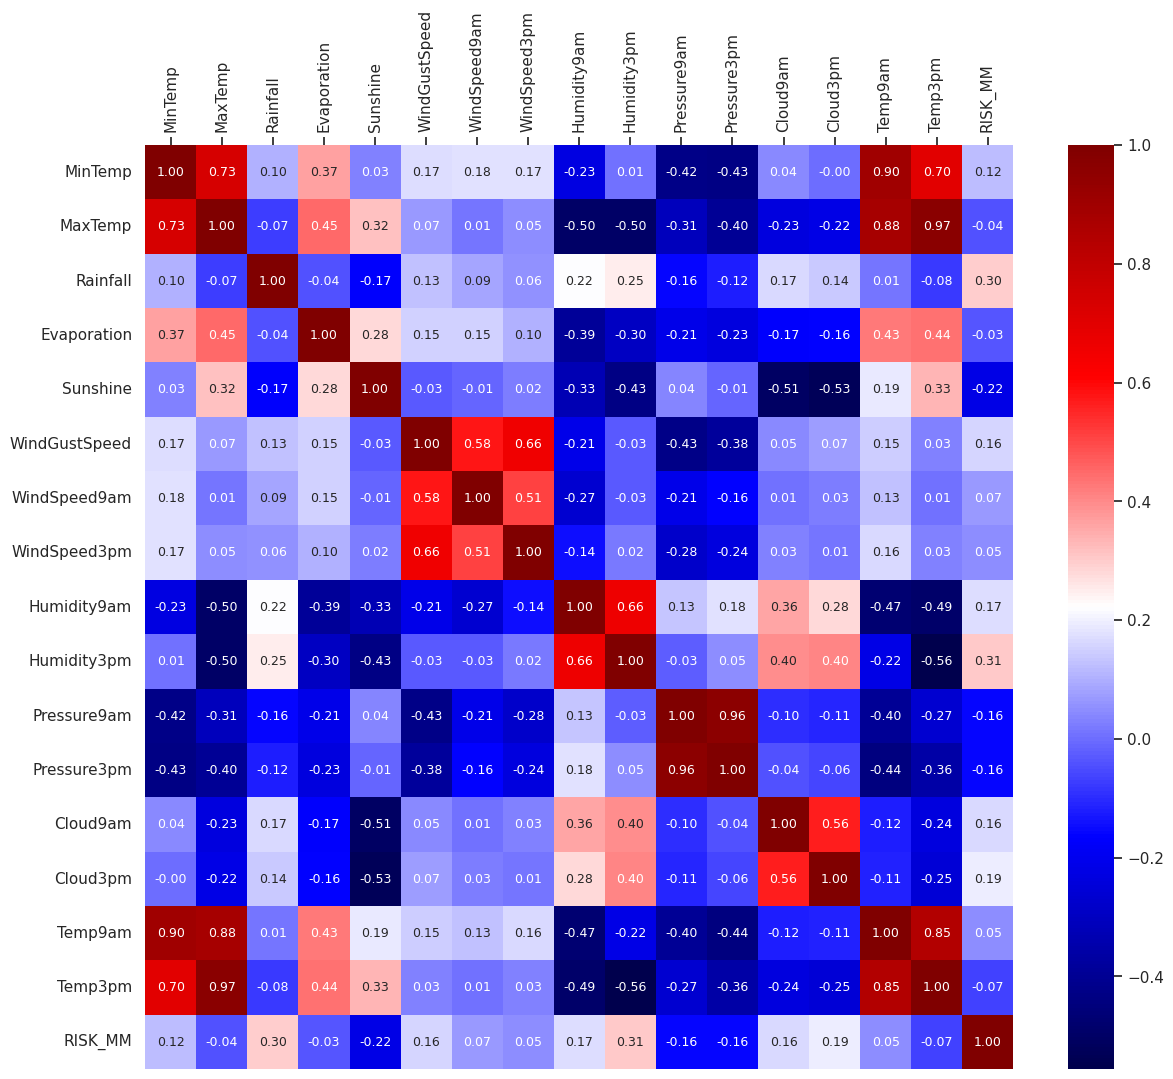

In [34]:
df_cont = df.loc[:, df.dtypes == np.float64]
plt.figure(figsize=(14, 12))
ax = sns.heatmap(df_cont.corr(), cmap='seismic', annot=True, annot_kws={'size': 9}, fmt='.2f')
ax.xaxis.tick_top()
ax.tick_params(axis='x', rotation=90)

<Figure size 1400x1400 with 0 Axes>

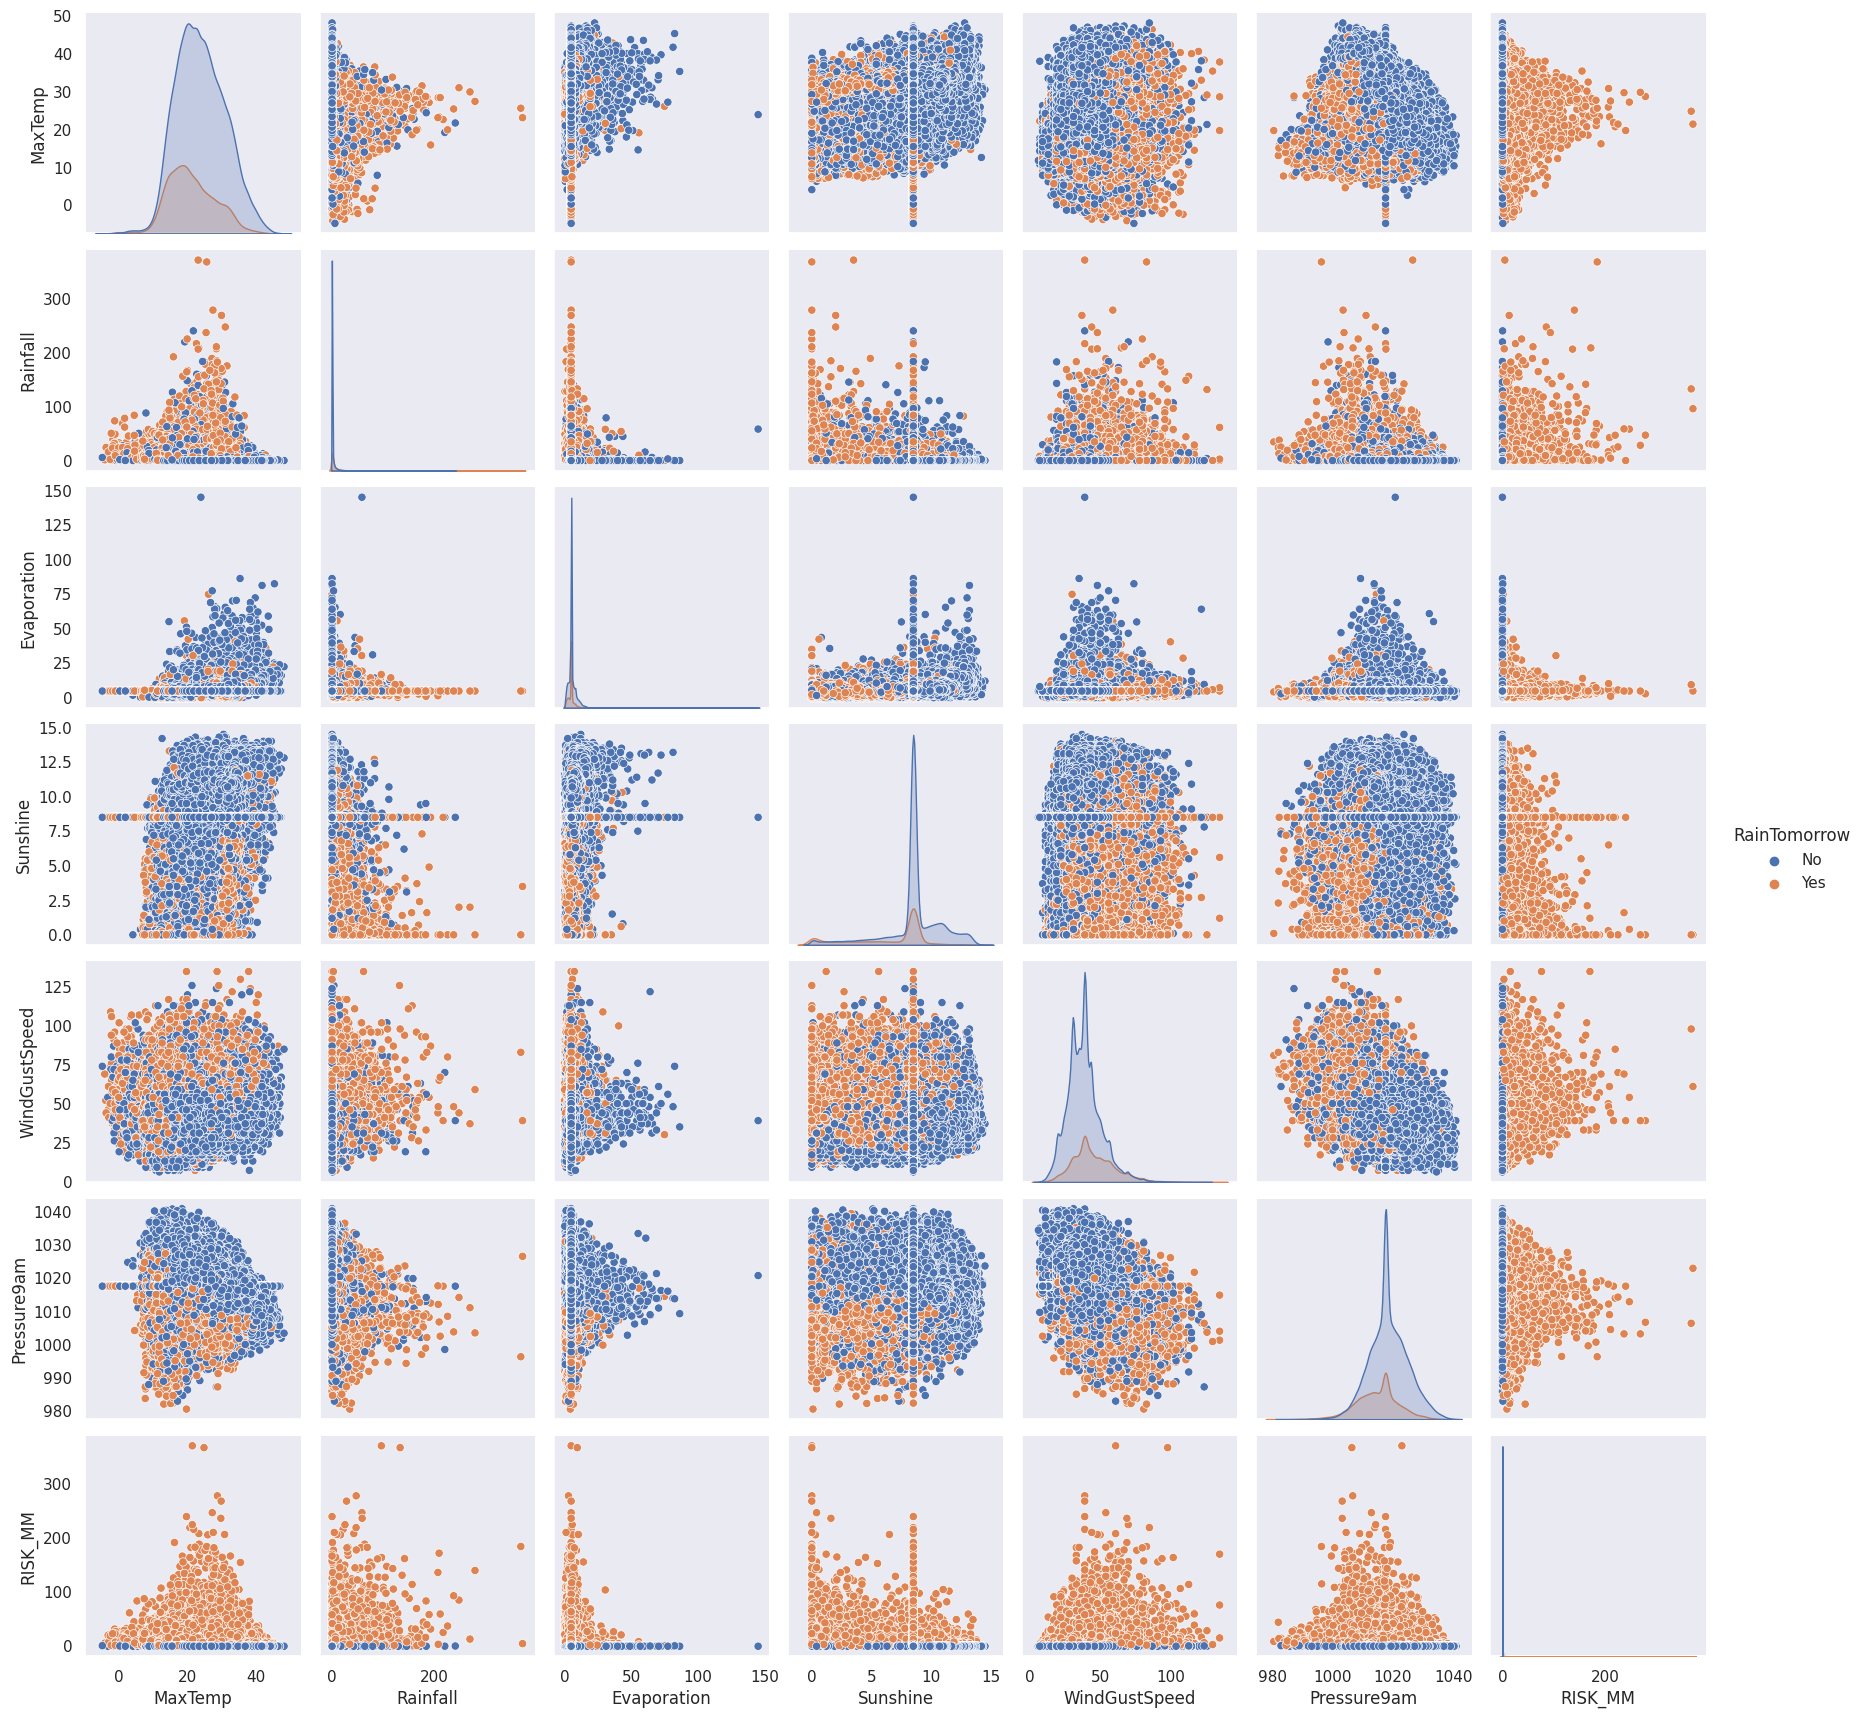

In [38]:
# keeping only one of the variables for highly correlated groups, along with the dependent variable RainTomorrow
uncor_vars = ['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Pressure9am', 'RISK_MM']
df_uncor = df[[*uncor_vars, 'RainTomorrow']]

# pairplots
plt.figure(figsize=(14, 14))
sns.pairplot(data=df_uncor, x_vars=uncor_vars, y_vars=uncor_vars, hue='RainTomorrow')

### Generalized linear model

In [39]:
dft = df.copy()

# casting our target to int, and also RainToday as it intuitively seems to be a relevant predictor
dft['RainTomorrow'] = dft[['RainTomorrow']].replace(['Yes', 'No'], [1, 0])
dft['RainToday'] = dft[['RainToday']].replace(['Yes', 'No'], [1, 0])

# taking all continuous variables
dft_x = dft.loc[:, (dft.dtypes == np.float64) | (dft.dtypes == np.int64)]

First we check the normality & homoscedasticity of all the continuous variables involved through histograms

array([[<AxesSubplot: title={'center': 'MinTemp'}>,
        <AxesSubplot: title={'center': 'MaxTemp'}>,
        <AxesSubplot: title={'center': 'Rainfall'}>,
        <AxesSubplot: title={'center': 'Evaporation'}>],
       [<AxesSubplot: title={'center': 'Sunshine'}>,
        <AxesSubplot: title={'center': 'WindGustSpeed'}>,
        <AxesSubplot: title={'center': 'WindSpeed9am'}>,
        <AxesSubplot: title={'center': 'WindSpeed3pm'}>],
       [<AxesSubplot: title={'center': 'Humidity9am'}>,
        <AxesSubplot: title={'center': 'Humidity3pm'}>,
        <AxesSubplot: title={'center': 'Pressure9am'}>,
        <AxesSubplot: title={'center': 'Pressure3pm'}>],
       [<AxesSubplot: title={'center': 'Cloud9am'}>,
        <AxesSubplot: title={'center': 'Cloud3pm'}>,
        <AxesSubplot: title={'center': 'Temp9am'}>,
        <AxesSubplot: title={'center': 'Temp3pm'}>],
       [<AxesSubplot: title={'center': 'RainToday'}>,
        <AxesSubplot: title={'center': 'RainTomorrow'}>, <AxesSubplot:

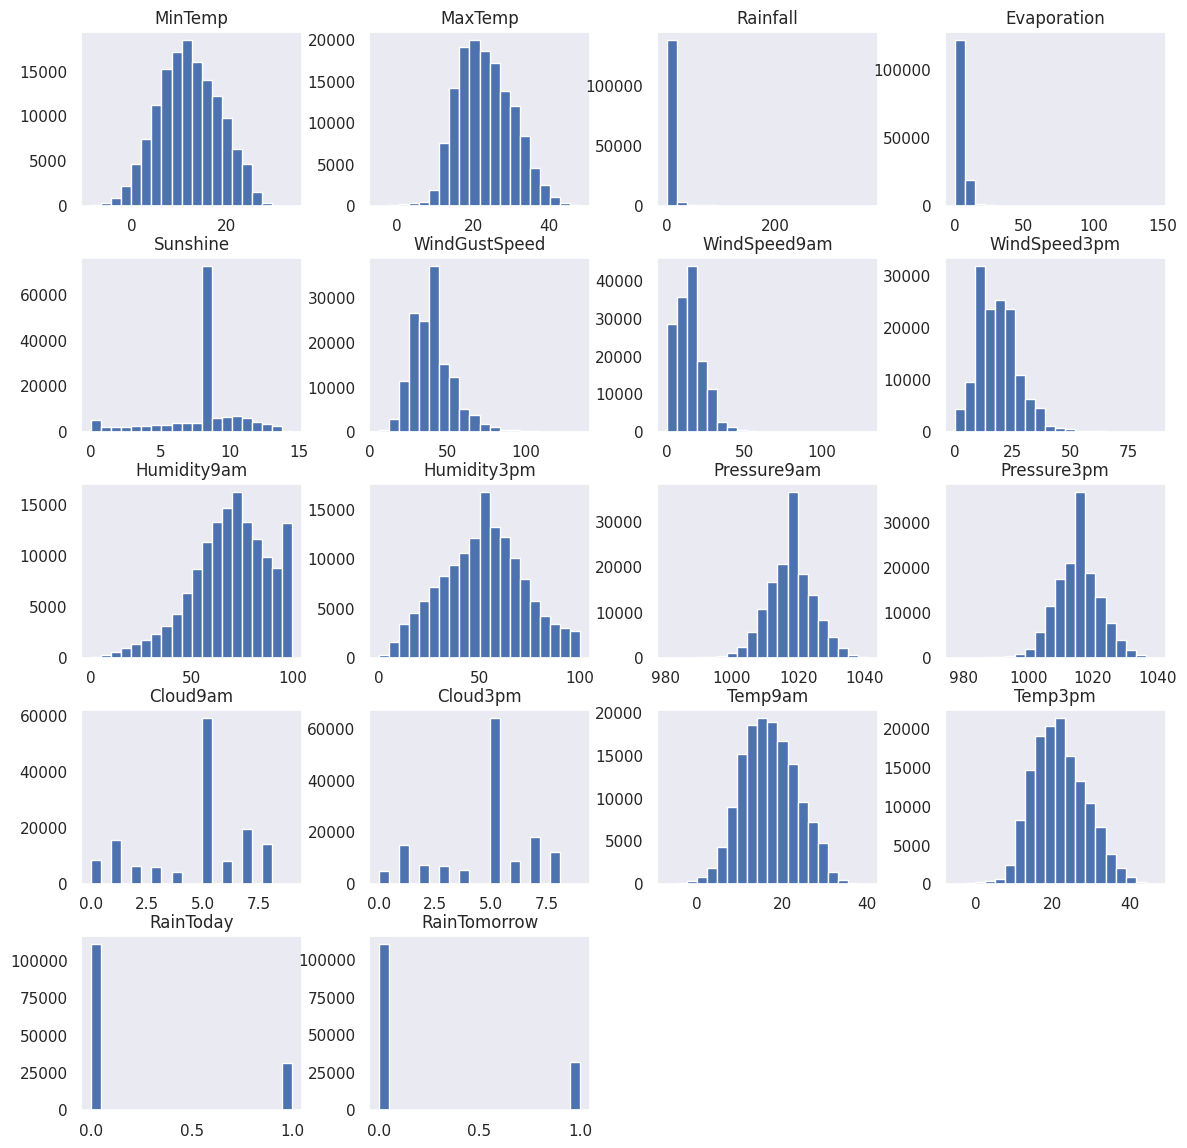

In [58]:
dft_x.hist(figsize=(14, 14), bins=20, grid=False)

In [41]:
# omitted RISK_MM as it gave PerfectSeparationError with the GLM
dft_x = dft_x.drop(columns=['RISK_MM'])

Full model

In [42]:
from statsmodels.formula.api import glm


full_glm = glm(formula = 'C(RainTomorrow) ~ MinTemp + MaxTemp + Rainfall + Evaporation + Sunshine + WindGustSpeed + WindSpeed9am + WindSpeed3pm + Humidity9am + Humidity3pm + Pressure9am + Pressure3pm + C(Cloud9am) + C(Cloud3pm) + Temp9am + Temp3pm + C(RainToday)',
  data=dft_x,
  family=sm.families.Binomial()
).fit()

print(f'Summary\n'
      f'{full_glm.summary()}\n'
      f'AIC: {full_glm.aic:.3f}'
)

Summary
                              Generalized Linear Model Regression Results                               
Dep. Variable:     ['C(RainTomorrow)[0]', 'C(RainTomorrow)[1]']   No. Observations:               142193
Model:                                                      GLM   Df Residuals:                   142159
Model Family:                                          Binomial   Df Model:                           33
Link Function:                                            Logit   Scale:                          1.0000
Method:                                                    IRLS   Log-Likelihood:                -51376.
Date:                                          Tue, 07 Mar 2023   Deviance:                   1.0275e+05
Time:                                                  18:14:23   Pearson chi2:                 1.39e+05
No. Iterations:                                              20   Pseudo R-squ. (CS):             0.2894
Covariance Type:                               

Now, we take the parameters with the lowest variation inflation factors, eliminating variables with highest VIF iteratively to create a linear model

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# get vifs for a dataframe
def vifs(dfp):
  vif = pd.DataFrame()
  vif['variables'] = dfp.columns
  vif['VIF'] = [variance_inflation_factor(dfp.values, i) for i in range(dfp.shape[1])]
  return vif

# return reduced number of columns with vifs < param via iterative elimination
def vifs_till(dfp, mv):
  max_vif = np.Inf

  while True:
    viff = vifs(dfp)
    max_idx = np.argmax(viff[['VIF']])
    col_to_remove = viff.iloc[max_idx, 0]
    max_vif = viff.iloc[max_idx, 1]
    if max_vif > mv:
      dfp = dfp.drop(columns=[col_to_remove])
    else:
      return viff

In [50]:
# remove target variable for analysing vifs
dft_vif = dft_x.drop(columns=['RainTomorrow'])
vifs(dft_vif)

,variables,VIF
0,MinTemp,39.379554
1,MaxTemp,260.132757
2,Rainfall,1.481593
3,Evaporation,5.061686
4,Sunshine,16.131376
5,WindGustSpeed,22.306272
6,WindSpeed9am,6.313963
7,WindSpeed3pm,10.848319
8,Humidity9am,51.934352
9,Humidity3pm,36.999261


In [51]:
# for vifs <= 5
vifs_till(dft_vif, 5)

,variables,VIF
0,Rainfall,1.439817
1,Evaporation,2.750096
2,WindSpeed9am,3.102680
3,Cloud9am,3.000552
4,RainToday,1.804033


In [52]:
# model with predictors seen above after removing variables with VIFs higher than the threshold

vif5_glm = glm(formula='C(RainTomorrow) ~ Rainfall + Evaporation + WindSpeed9am + C(Cloud9am) + C(RainToday)',
  data=dft_x,
  family=sm.families.Binomial()
).fit()

print(f'Summary\n'
      f'{vif5_glm.summary()}\n'
      f'AIC: {vif5_glm.aic:.3f}'
)

Summary
                              Generalized Linear Model Regression Results                               
Dep. Variable:     ['C(RainTomorrow)[0]', 'C(RainTomorrow)[1]']   No. Observations:               142193
Model:                                                      GLM   Df Residuals:                   142179
Model Family:                                          Binomial   Df Model:                           13
Link Function:                                            Logit   Scale:                          1.0000
Method:                                                    IRLS   Log-Likelihood:                -65860.
Date:                                          Tue, 07 Mar 2023   Deviance:                   1.3172e+05
Time:                                                  18:22:09   Pearson chi2:                 1.43e+05
No. Iterations:                                              19   Pseudo R-squ. (CS):             0.1289
Covariance Type:                               

Going to lower VIFs hurt the AIC

### Principal Component Analysis

In [53]:
# filters out non-continouous independent data and target variable
dfx = df.loc[:, df.dtypes == np.float64]

In [54]:
# Normalize data before analysis to equalize the influence of each feature
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(dfx)
print(X.shape, np.mean(X), np.std(X)) # checking if data is consistent & standardized

(142193, 17) -7.261919650839281e-16 0.9999999999999997


In [55]:
# converting the normalized features into a dataframe

dfX = pd.DataFrame(X, columns=dfx.columns)
dfX.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,0.190085,-0.045764,-0.204920,-0.120303,0.16528,0.310479,0.678693,0.614071,0.113127,-1.436563,-1.474667,-1.220105,1.460297,0.140339,-0.013238,0.018050,-0.278450
1,-0.749042,0.263677,-0.276125,-0.120303,0.16528,0.310479,-1.128893,0.384757,-1.312997,-1.290451,-1.044798,-1.115343,0.152737,0.140339,0.033114,0.381886,-0.278450
2,0.111824,0.348070,-0.276125,-0.120303,0.16528,0.462679,0.565719,0.843386,-1.629913,-1.046931,-1.489490,-0.980648,0.152737,-1.275593,0.620242,0.221798,-0.278450
3,-0.467304,0.671577,-0.276125,-0.120303,0.16528,-1.211523,-0.338074,-1.105785,-1.260177,-1.728788,-0.007183,-0.367040,0.152737,0.140339,0.172171,0.702062,-0.160497
4,0.831821,1.276393,-0.157450,-0.120303,0.16528,0.082179,-0.789970,0.155443,0.694140,-0.900818,-1.015152,-1.384732,1.024444,1.556271,0.125818,1.167773,-0.254859


In [56]:
from sklearn.decomposition import PCA

pca = PCA()
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(pcs[:, 0:2], columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,0.942879,1.223973
1,1.161728,-0.220083
2,2.191032,0.210729
3,0.981119,-1.537405
4,1.434001,1.187003
...,...,...
142188,-1.193333,-1.851874
142189,-0.867325,-2.057741
142190,-0.634745,-2.216861
142191,0.010858,-1.666275


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

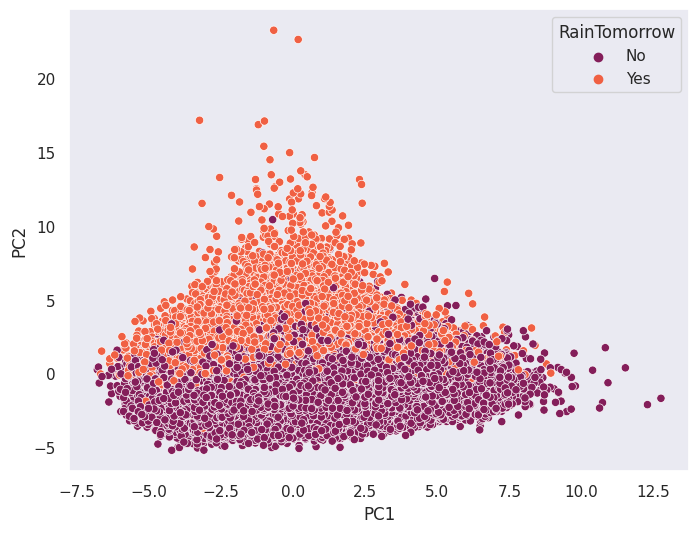

In [62]:
# adding the target variable to the pca dataframe
pca_df['RainTomorrow'] = df[['RainTomorrow']]

# plot pca transformed data on the first two axes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='RainTomorrow', palette='rocket')

We do not get good clustering on the first two PC axes, but see a definite division among our target variable categories. To answer the question, how many clusters we should divide the data into, we look into the broken-stick model to see the variances explained by each PC axis.

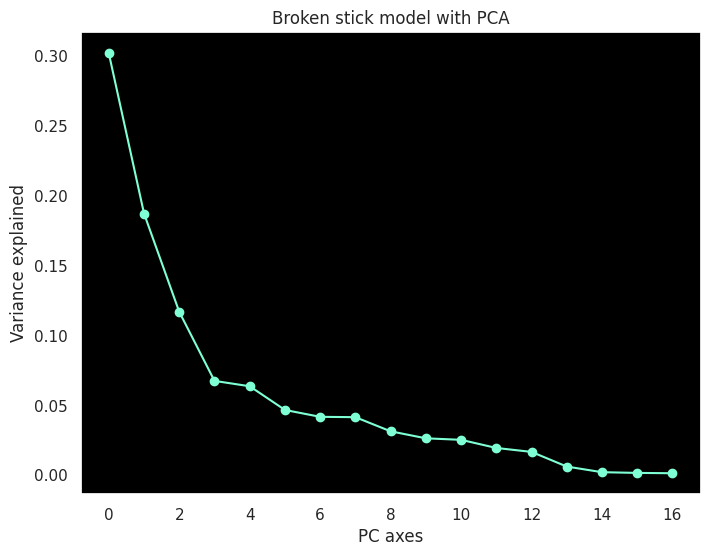

In [66]:
fig, axes = plt.subplots(figsize=(8, 6))
axes.set_facecolor('black')
plt.xlabel('PC axes')
plt.ylabel('Variance explained')
plt.title('Broken stick model with PCA')
plt.plot(pca.explained_variance_ratio_, color='aquamarine', marker='o', linestyle='solid')

Looking at the plot, four clusters should be an appropriate split or four PCA components seem to be appropriate for a good prediction model.

### K-Means Clustering

In [67]:
from sklearn.cluster import KMeans

In [68]:
# 4 clusters
kmeans = KMeans(n_clusters=4)

# fit model on the PC transformed data
kmeans = kmeans.fit(pcs)

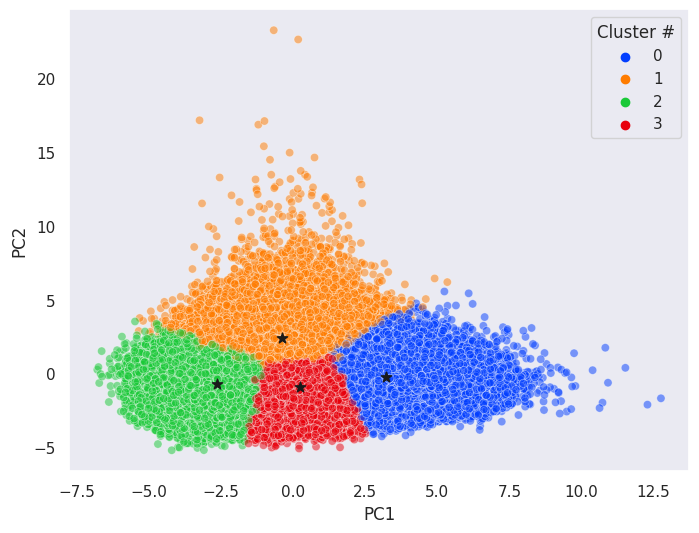

In [70]:
# only first 2 coordinates for centres
centres = kmeans.cluster_centers_
labels = kmeans.labels_

# adding the cluster labels to the pca dataframe
pca_df['Cluster #'] = labels

fig, axes = plt.subplots(figsize=(8, 6))

# plot pca transformed data on the first two axes
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster #', palette='bright', alpha=0.5)

# plot cluster centres
plt.scatter(x=centres[:, 0], y=centres[:, 1], marker='*', c='k', s=60)